In [258]:
import numpy as np
import pandas as pd

In [259]:
df = pd.read_excel(r"C:\Users\disha\Downloads\HousePricePrediction.xlsx")


In [260]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [261]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
df.set_index("Id",inplace = True)

In [264]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,,,,,,,,,,,,
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN


In [265]:
obj_features = (df.dtypes == 'object')
object_cols = list(obj_features[obj_features].index)
object_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [266]:
int_features = (df.dtypes == 'int64')
int_cols = list(int_features[int_features].index)
int_cols

['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

In [267]:
float_features = (df.dtypes == 'float')
float_cols = list(float_features[float_features].index)
float_cols

['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']

In [268]:
df.corr()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.201730,-0.065625,0.034409,0.043315,-0.072530,-0.219965,-0.084284
LotArea,-0.201730,1.000000,-0.035617,0.024128,0.021612,0.084059,0.254138,0.263843
OverallCond,-0.065625,-0.035617,1.000000,-0.368477,0.047654,0.041501,-0.174002,-0.077856
YearBuilt,0.034409,0.024128,-0.368477,1.000000,0.612235,-0.027595,0.408515,0.522897
YearRemodAdd,0.043315,0.021612,0.047654,0.612235,1.000000,-0.062153,0.298107,0.507101
BsmtFinSF2,-0.072530,0.084059,0.041501,-0.027595,-0.062153,1.000000,0.089410,-0.011378
TotalBsmtSF,-0.219965,0.254138,-0.174002,0.408515,0.298107,0.089410,1.000000,0.613581
SalePrice,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


<AxesSubplot:>

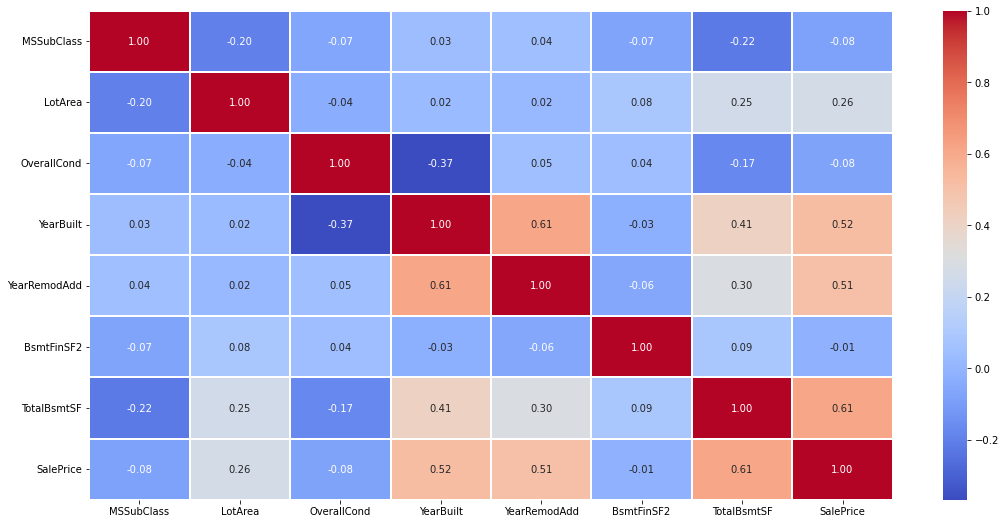

In [269]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(),cmap = 'coolwarm',fmt = '.2f',linewidths = 2,annot = True)

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

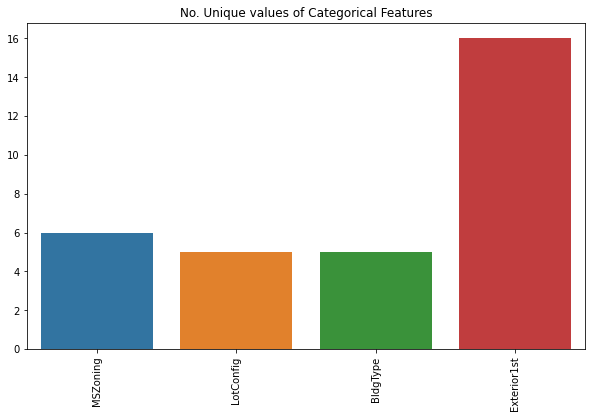

In [270]:
unique_val = []
for col in object_cols:
    unique_val.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_val)

In [271]:
unique_val1 = []
for col in object_cols:
    unique_val1.append(df[col].unique().tolist())
unique_val1

[['RL', 'RM', 'C (all)', 'FV', 'RH', nan],
 ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
 ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
 ['VinylSd',
  'MetalSd',
  'Wd Sdng',
  'HdBoard',
  'BrkFace',
  'WdShing',
  'CemntBd',
  'Plywood',
  'AsbShng',
  'Stucco',
  'BrkComm',
  'AsphShn',
  'Stone',
  'ImStucc',
  'CBlock',
  nan]]

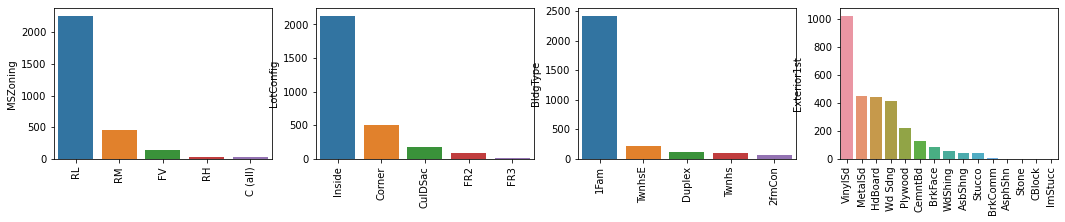

In [272]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [273]:
df["SalePrice"].fillna(df["SalePrice"].mean(),inplace = True)
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,,,,,,,,,,,,
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589


In [274]:
df.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [275]:
df.dropna(inplace = True)
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [276]:
object_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [277]:
df = pd.get_dummies(df, columns = object_cols)
print(df)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
Id                                                                            
0             60     8450            5       2003          2003         0.0   
1             20     9600            8       1976          1976         0.0   
2             60    11250            5       2001          2002         0.0   
3             70     9550            5       1915          1970         0.0   
4             60    14260            5       2000          2000         0.0   
...          ...      ...          ...        ...           ...         ...   
2914         160     1936            7       1970          1970         0.0   
2915         160     1894            5       1970          1970         0.0   
2916          20    20000            7       1960          1996         0.0   
2917          85    10441            5       1992          1992         0.0   
2918          60     9627            5       1993   

In [278]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.85, test_size=0.15, random_state=0)

In [290]:
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVMR = svm.SVR()
model_SVMR.fit(X_train,Y_train)
Y_pred_SVMR = model_SVMR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred_SVMR)

0.18131365209165395

In [287]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=15)
model_RFR.fit(X_train, Y_train)
Y_pred_RFR = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred_RFR)

0.18699847816285073

In [291]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_LR = model_LR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred_LR)

0.19031438680029597

In [294]:
import xgboost as xg

ModuleNotFoundError: No module named 'xgboost'